# GOOD NEWS ROBOT

In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import math
import re

### NewsAPI connection

In [166]:
import getpass
import requests

In [254]:
import datetime
from datetime import date
from datetime import timedelta

In [168]:
API_KEY=str(getpass.getpass('NewsAPI key?'))

NewsAPI key?········


In [281]:
#today = str(date.today())
#last_week_day = str(date.today() - timedelta(days=7))

In [224]:
#EVERYTHING
response = requests.get('https://newsapi.org/v2/everything?from='+last_week_day+'&sources=bbc-news&pageSize=100&apiKey='+API_KEY)

In [192]:
response

<Response [200]>

In [193]:
json = response.json()

In [194]:
json.keys()

dict_keys(['status', 'totalResults', 'articles'])

In [195]:
json['totalResults']

1459

In [196]:
len(json['articles'])

100

In [205]:
number_of_requests = math.ceil(json['totalResults']/len(json['articles']))

In [206]:
number_of_requests

15

- We will take the first 100 news of the last 8 days (eg. If tody is monday, we will take from last monday to current monday, both included)

In [325]:
def last_week_list():
    today = str(date.today())
    last_week = pd.date_range(end=today, periods=8)
    return list(last_week.strftime("%Y-%m-%d"))

In [326]:
last_week_list()

['2021-07-21',
 '2021-07-22',
 '2021-07-23',
 '2021-07-24',
 '2021-07-25',
 '2021-07-26',
 '2021-07-27',
 '2021-07-28']

In [296]:
#test_list_days = ['2021-07-27','2021-07-28']

In [327]:
#def NewsAPI_request_8():
#    responses = []
    
#    today = str(date.today())
#    last_week = pd.date_range(end=today, periods=8)
#    last_week_list = list(last_week.strftime("%Y-%m-%d"))
    #last_week_list = ['2021-07-27','2021-07-28']
    
#    for d in last_week_list:
        #r = requests.get('https://newsapi.org/v2/everything?from={}&to={}&sources=bbc-news&pageSize=100&apiKey='+API_KEY.format(d,d))
#        r = requests.get('https://newsapi.org/v2/everything?from='+d+'&to='+d+'&sources=bbc-news&pageSize=100&apiKey='+API_KEY)
#        responses.append(r.json())
                        
#    return pd.DataFrame(responses)

In [330]:
# NewsAPI_df.to_csv('28_07_2021_NewsAPI_results.csv', index=False)

In [361]:
def NewsAPI_request_8days():
    responses = []
    
    today = str(date.today())
    last_week = pd.date_range(end=today, periods=8)
    last_week_list = list(last_week.strftime("%Y-%m-%d"))
    
    
    for d in last_week_list:
        r = requests.get('https://newsapi.org/v2/everything?from='+d+'&to='+d+'&sources=bbc-news&pageSize=100&apiKey='+API_KEY)
        responses.append(r.json())
                        
    return responses

In [362]:
responses_8_days = NewsAPI_request_8days()

In [363]:
len(responses_8_days)

8

In [366]:
len(responses_8_days[7]['articles'])

100

## Storing relevant data from API into Dataframe

In [367]:
responses_8_days

[{'status': 'ok',
  'totalResults': 219,
  'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'},
    'author': 'https://www.facebook.com/bbcnews',
    'title': 'Call for online abusers to be reported to employers',
    'description': 'A group is calling for companies to set up ways for people to report workers behaving abusively online.',
    'url': 'https://www.bbc.co.uk/news/technology-57907852',
    'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/2426/production/_106345290_gettyimages-1058608408.jpg',
    'publishedAt': '2021-07-21T23:39:40Z',
    'content': 'By Zoe KleinmanTechnology reporter\r\nimage copyrightGetty Images\r\nA group of cyber-security experts is urging companies to set up a way for people to report their workers behaving abusively online.\r\nA… [+1823 chars]'},
   {'source': {'id': 'bbc-news', 'name': 'BBC News'},
    'author': 'https://www.facebook.com/bbcnews',
    'title': "Tokyo 2020 Olympics: India's top medal contenders",
    'descrip

In [414]:
def get_news_text(responses):
    
    day = []
    article = []
    
    for day in responses:
        
        for ar in day['articles']:
            list_items = [ar['title'],ar['description'],ar['url']]
            #article.append(ar['title'])
            #article.append(ar['description'])
            #article.append(ar['url'])
            article.extend([list_items])
    
    return article
    

In [417]:
nested_data = get_news_text(responses_8_days)

In [420]:
NewsAPI_BBC_df = pd.DataFrame(nested_data, columns=['title', 'description', 'url'])

In [502]:
NewsAPI_BBC_df.to_csv('BBC_df_8days_API_28_07_2021.csv', index=False)

In [510]:
API_data = pd.read_csv('BBC_df_8days_API_28_07_2021.csv')

In [511]:
API_data

,title,description,url
0,Call for online abusers to be reported to empl...,A group is calling for companies to set up way...,https://www.bbc.co.uk/news/technology-57907852
1,Tokyo 2020 Olympics: India's top medal contenders,India sends its largest ever contingent to the...,https://www.bbc.co.uk/news/world-asia-india-57...
2,Benin Bronzes: Nigeria dispute jeopardises ret...,Several museums in Europe have talked of retur...,https://www.bbc.co.uk/news/world-africa-57914111
3,Soldier statue reignites Spanish row over fascism,"Spain's legionnaires symbolised fascism, but M...",https://www.bbc.co.uk/news/world-europe-57902023
4,Covid: Where and why is the US vaccine rollout...,Vaccinations in the US are slowing as infectio...,https://www.bbc.co.uk/news/57889961
...,...,...,...
795,Tokyo Olympics: Daniil Medvedev & Paula Badosa...,Daniil Medvedev struggles to breathe in the To...,https://www.bbc.co.uk/sport/olympics/57995342
796,Oculus recalls Quest 2 headset pads after skin...,Quest 2 headset owners are urged to claim a fr...,https://www.bbc.co.uk/news/technology-57997112
797,'Superhuman Biles is brave & strong - and her ...,Athletes discuss Simone Biles' decision to pri...,https://www.bbc.co.uk/sport/olympics/57996321
798,Tokyo Olympics: Argentina beat Great Britain 1...,Team GB miss out on a medal after a 17-12 defe...,https://www.bbc.co.uk/sport/av/olympics/57998199


## Creating text column

In [512]:
API_data["text"] = API_data["title"] +'.'+ API_data["description"]

In [516]:
API_data.head()

,title,description,url,text
0,Call for online abusers to be reported to empl...,A group is calling for companies to set up way...,https://www.bbc.co.uk/news/technology-57907852,Call for online abusers to be reported to empl...
1,Tokyo 2020 Olympics: India's top medal contenders,India sends its largest ever contingent to the...,https://www.bbc.co.uk/news/world-asia-india-57...,Tokyo 2020 Olympics: India's top medal contend...
2,Benin Bronzes: Nigeria dispute jeopardises ret...,Several museums in Europe have talked of retur...,https://www.bbc.co.uk/news/world-africa-57914111,Benin Bronzes: Nigeria dispute jeopardises ret...
3,Soldier statue reignites Spanish row over fascism,"Spain's legionnaires symbolised fascism, but M...",https://www.bbc.co.uk/news/world-europe-57902023,Soldier statue reignites Spanish row over fasc...
4,Covid: Where and why is the US vaccine rollout...,Vaccinations in the US are slowing as infectio...,https://www.bbc.co.uk/news/57889961,Covid: Where and why is the US vaccine rollout...


In [426]:
#API_data["textURL"] = API_data["title"] +'.'+ API_data["description"]+'.'+ API_data["url"]


## Removing unnecessary columns & applying lower_tok_stop

In [517]:
API_data = API_data.drop(columns=['title', 'description', 'url'])

In [524]:
train.head()

,label,text_clean
0,0,"['chinese', 'wine', 'tempts', 'italy', 'illva'..."
1,4,"['new', 'internet', 'names', 'internet', 'coul..."
2,4,"['next', 'consoles', 'next', 'generation', 'vi..."
3,1,"['sir', 'paul', 'rocks', 'super', 'bowl', 'cro..."
4,0,"['buyers', 'snap', 'jet', 'airways', 'shares',..."


In [520]:
API_data['text_clean'] = API_data['text'].apply(lower_tok_stop)

In [525]:
API_data = API_data.drop(columns = 'text')

In [526]:
API_data

,text_clean
0,"[call, online, abusers, reported, group, calli..."
1,"[tokyo, olympics, india, top, medal, sends, la..."
2,"[benin, bronzes, nigeria, dispute, jeopardises..."
3,"[soldier, statue, reignites, spanish, row, leg..."
4,"[covid, us, vaccine, rollout, slowing, us, slo..."
...,...
795,"[tokyo, olympics, daniil, medvedev, paula, bad..."
796,"[oculus, recalls, quest, headset, pads, skin, ..."
797,"[biles, brave, strong, honesty, could, change,..."
798,"[tokyo, olympics, argentina, beat, great, brit..."


In [529]:
API_data.to_csv('API_data_cleaned.csv', index = False)

## 1st approach: without URL info

In [430]:
NewsAPI_BBC_df['text_clean'] = NewsAPI_BBC_df['text'].apply(lower_tok_stop)

In [433]:
NewsAPI_BBC_df['textURL_clean'] = NewsAPI_BBC_df['textURL'].apply(lower_tok_stop)

In [437]:
NewsAPI_BBC_df['textURL'][0]

'Call for online abusers to be reported to employers.A group is calling for companies to set up ways for people to report workers behaving abusively online..https://www.bbc.co.uk/news/technology-57907852'

In [454]:

url_string = 'https://www.bbc.co.uk/news/technology-57907852'
pattern = re.compile('[\W_0-9]+')
dirty_list = url_string.split()
clean_list = [pattern.sub('', word) for word in dirty_list]
clean_string = ' '.join(clean_list)

In [456]:
clean_string

'httpswwwbbccouknewstechnology'

In [444]:
if '%tecnhology%' in NewsAPI_BBC_df['textURL'][0]:
    print('yes')
else:
    print('no')

no


In [440]:
tokensURL= word_tokenize(NewsAPI_BBC_df['textURL'][0])

In [441]:
tokensURL[-1].split("/")

['', '', 'www.bbc.co.uk', 'news', 'technology-57907852']

In [432]:
NewsAPI_BBC_df['text_clean'][0]

['call',
 'online',
 'abusers',
 'reported',
 'group',
 'calling',
 'companies',
 'set',
 'ways',
 'people',
 'report',
 'workers',
 'behaving',
 'abusively',
 'online']

In [434]:
NewsAPI_BBC_df['textURL_clean'][0]

['call',
 'online',
 'abusers',
 'reported',
 'group',
 'calling',
 'companies',
 'set',
 'ways',
 'people',
 'report',
 'workers',
 'behaving',
 'abusively',
 'online',
 'https']

# SIN URL

In [461]:
df = NewsAPI_BBC_df.drop(columns = ['textURL_clean', 'textURL'])

In [462]:
df

,title,description,url,text,text_clean
0,Call for online abusers to be reported to empl...,A group is calling for companies to set up way...,https://www.bbc.co.uk/news/technology-57907852,Call for online abusers to be reported to empl...,"[call, online, abusers, reported, group, calli..."
1,Tokyo 2020 Olympics: India's top medal contenders,India sends its largest ever contingent to the...,https://www.bbc.co.uk/news/world-asia-india-57...,Tokyo 2020 Olympics: India's top medal contend...,"[tokyo, olympics, india, top, medal, sends, la..."
2,Benin Bronzes: Nigeria dispute jeopardises ret...,Several museums in Europe have talked of retur...,https://www.bbc.co.uk/news/world-africa-57914111,Benin Bronzes: Nigeria dispute jeopardises ret...,"[benin, bronzes, nigeria, dispute, jeopardises..."
3,Soldier statue reignites Spanish row over fascism,"Spain's legionnaires symbolised fascism, but M...",https://www.bbc.co.uk/news/world-europe-57902023,Soldier statue reignites Spanish row over fasc...,"[soldier, statue, reignites, spanish, row, leg..."
4,Covid: Where and why is the US vaccine rollout...,Vaccinations in the US are slowing as infectio...,https://www.bbc.co.uk/news/57889961,Covid: Where and why is the US vaccine rollout...,"[covid, us, vaccine, rollout, slowing, us, slo..."
...,...,...,...,...,...
795,Tokyo Olympics: Daniil Medvedev & Paula Badosa...,Daniil Medvedev struggles to breathe in the To...,https://www.bbc.co.uk/sport/olympics/57995342,Tokyo Olympics: Daniil Medvedev & Paula Badosa...,"[tokyo, olympics, daniil, medvedev, paula, bad..."
796,Oculus recalls Quest 2 headset pads after skin...,Quest 2 headset owners are urged to claim a fr...,https://www.bbc.co.uk/news/technology-57997112,Oculus recalls Quest 2 headset pads after skin...,"[oculus, recalls, quest, headset, pads, skin, ..."
797,'Superhuman Biles is brave & strong - and her ...,Athletes discuss Simone Biles' decision to pri...,https://www.bbc.co.uk/sport/olympics/57996321,'Superhuman Biles is brave & strong - and her ...,"[biles, brave, strong, honesty, could, change,..."
798,Tokyo Olympics: Argentina beat Great Britain 1...,Team GB miss out on a medal after a 17-12 defe...,https://www.bbc.co.uk/sport/av/olympics/57998199,Tokyo Olympics: Argentina beat Great Britain 1...,"[tokyo, olympics, argentina, beat, great, brit..."


# TF VECTORIZER

In [464]:
train = pd.read_csv('BBC_news_train.csv')


In [465]:
train.head()

,category,title,content,text,label,text_clean
0,business,Chinese wine tempts Italy's Illva,Italy's Illva Saronno has agreed to buy 33% o...,Chinese wine tempts Italy's Illva. Italy's Ill...,0,"['chinese', 'wine', 'tempts', 'italy', 'illva'..."
1,tech,Go-ahead for new internet names,The internet could soon have two new domain n...,Go-ahead for new internet names. The internet ...,4,"['new', 'internet', 'names', 'internet', 'coul..."
2,tech,What's next for next-gen consoles?,The next generation of video games consoles a...,What's next for next-gen consoles?. The next g...,4,"['next', 'consoles', 'next', 'generation', 'vi..."
3,entertainment,Sir Paul rocks Super Bowl crowds,Sir Paul McCartney wowed fans with a live min...,Sir Paul rocks Super Bowl crowds. Sir Paul McC...,1,"['sir', 'paul', 'rocks', 'super', 'bowl', 'cro..."
4,business,Buyers snap up Jet Airways' shares,Investors have snapped up shares in Jet Airwa...,Buyers snap up Jet Airways' shares. Investors ...,0,"['buyers', 'snap', 'jet', 'airways', 'shares',..."


# NEWS CATEGORIZATION

In [77]:
df = pd.read_csv('bbc-news-data.csv', sep='\t')

In [78]:
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [79]:
df.shape

(2225, 4)

In [80]:
df = df.drop(columns=['filename'])

In [81]:
df.isnull().sum()

category    0
title       0
content     0
dtype: int64

### Creating text column: title + content

In [82]:
df["text"] = df["title"] +'.'+ df["content"]

In [83]:
df = df.drop_duplicates()

In [84]:
df.shape

(2127, 4)

In [85]:
duplicated_content = df[df.duplicated(subset=['content'], keep=False)]

In [86]:
duplicated_content

,category,title,content,text
266,business,Nasdaq planning $100m share sale,The owner of the technology-dominated Nasdaq ...,Nasdaq planning $100m share sale. The owner of...
285,business,China continues breakneck growth,China's economy has expanded by a breakneck 9...,China continues breakneck growth. China's econ...
289,business,Bank holds interest rate at 4.75%,The Bank of England has left interest rates o...,Bank holds interest rate at 4.75%. The Bank of...
364,business,Nasdaq planning $100m-share sale,The owner of the technology-dominated Nasdaq ...,Nasdaq planning $100m-share sale. The owner of...
437,business,UK interest rates held at 4.75%,The Bank of England has left interest rates o...,UK interest rates held at 4.75%. The Bank of E...
...,...,...,...,...
2113,tech,Fast moving phone viruses appear,Security firms are warning about several mobi...,Fast moving phone viruses appear. Security fir...
2144,tech,Consumer concern over RFID tags,Consumers are very concerned about the use of...,Consumer concern over RFID tags. Consumers are...
2156,tech,US woman sues over ink cartridges,"A US woman is suing Hewlett Packard (HP), say...",US woman sues over ink cartridges. A US woman ...
2195,tech,Text message record smashed again,UK mobile owners continue to break records wi...,Text message record smashed again. UK mobile o...


- We have some news that are the same but have different headers. We keep them anyway

### Label encoding

In [87]:
df['category'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

- business: 0
- entertainment: 1
- politics: 2
- sport: 3
- tech: 4

In [88]:
def label(category):
    if category == 'business':
        return 0
    elif category == 'entertainment':
        return 1
    elif category == 'politics':
        return 2
    elif category == 'sport':
        return 3
    elif category == 'tech':
        return 4
    else:
        return None

In [89]:
df['label']=df['category'].apply(lambda x: label(x))

In [90]:
df

,category,title,content,text,label
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit. Quarterly p...,0
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech. The dollar h...,0
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim. The owners ...,0
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits. British Air...,0
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq. Shares in U...,0
...,...,...,...,...,...
2219,tech,New consoles promise big problems,Making games for future consoles will require...,New consoles promise big problems. Making game...,4
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,BT program to beat dialler scams. BT is introd...,4
2222,tech,Be careful how you code,A new European directive could put software w...,Be careful how you code. A new European direct...,4
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...,US cyber security chief resigns. The man makin...,4


In [91]:
groups = df['category'].value_counts()

In [92]:
groups

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: category, dtype: int64

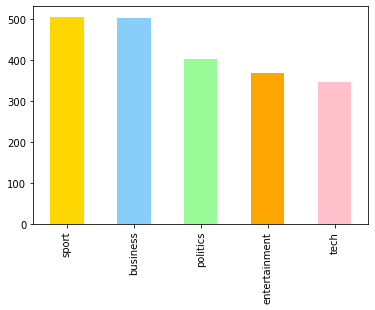

In [93]:
ax = groups.plot(kind = 'bar', color=['gold', 'lightskyblue', 'palegreen', 'orange', 'pink'])

### Preprocessing

In order to make the model more efficient, let's clean the text

In [94]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [72]:
#stop_words = stopwords.words('english')

#### Lower the data, tokenize and remove stopwords

In [75]:
#df['title'] = df['title'].apply(lambda x: x.lower())
#df['content'] = df['content'].apply(lambda x: x.lower())
#df['text'] = df['text'].apply(lambda x: x.lower())

In [291]:
#def tokenize(text):
#    tokenized = word_tokenize(text)
#    return tokenized

In [429]:
def lower_tok_stop(text):
    
    stop_words = stopwords.words('english')
    
    lower_text = text.lower()
    tokens = word_tokenize(lower_text)
    clean_tokens = [word for word in tokens if word.isalpha()]
    remove_stop = [word for word in clean_tokens if not word in stop_words]
    return remove_stop

In [97]:
df['text_clean'] = df['text'].apply(lower_tok_stop)

In [98]:
df

,category,title,content,text,label,text_clean
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit. Quarterly p...,0,"[ad, sales, boost, time, warner, profit, quart..."
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech. The dollar h...,0,"[dollar, gains, greenspan, speech, dollar, hit..."
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim. The owners ...,0,"[yukos, unit, buyer, faces, loan, claim, owner..."
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits. British Air...,0,"[high, fuel, prices, hit, ba, profits, british..."
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq. Shares in U...,0,"[pernod, takeover, talk, lifts, domecq, shares..."
...,...,...,...,...,...,...
2219,tech,New consoles promise big problems,Making games for future consoles will require...,New consoles promise big problems. Making game...,4,"[new, consoles, promise, big, problems, making..."
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,BT program to beat dialler scams. BT is introd...,4,"[bt, program, beat, dialler, scams, bt, introd..."
2222,tech,Be careful how you code,A new European directive could put software w...,Be careful how you code. A new European direct...,4,"[careful, code, new, european, directive, coul..."
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...,US cyber security chief resigns. The man makin...,4,"[us, cyber, security, chief, resigns, man, mak..."


In [99]:
df = df.reset_index(drop=True)

In [101]:
df.to_csv('bbc-news-data-processed.csv')

## Maybe later increase stopwords!! also, us...

## Feature engineering: TF-IDF

TF-IDF (Term Frequency Inverse Document Frequency) is an algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction

TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator

https://iq.opengenus.org/naive-bayes-on-tf-idf-vectorized-matrix/

- tf: Term Frequency = count(t, d) i.e., count of term t in document d.
- idf: inverse document frequency function --> idf ( t, d ) = log ( D / { d ∈ D : t ∈ d })


- t is the term/ word
- d is the document
- D is the total number of documents
- { d ∈ D : t ∈ d } denotes the number of documents in which t occur

- **tf-idf = tf * idf**

## Split train and test datases: 70/30

The dataset is sorted alphabetically by category! I will inercalate them using label

In [352]:
df.groupby('label').cumcount()

0         0
1         1
2         2
3         3
4         4
       ... 
2122    342
2123    343
2124    344
2125    345
2126    346
Length: 2127, dtype: int64

In [374]:
df['label_cumcounts'] = df.groupby('label').cumcount()

df=df.sort_values(['label_cumcounts', 'label'])
df=df.drop(columns=['label_cumcounts'])

In [375]:
df.tail(10)

,category,title,content,text,label,text_clean
2111,business,krispy kreme shares hit,shares in krispy kreme doughnuts have taken a...,krispy kreme shares hit. shares in krispy krem...,0,"[krispy, kreme, shares, hit, shares, krispy, k..."
2106,sport,bryan twins keep us hopes alive,the united states kept the davis cup final al...,bryan twins keep us hopes alive. the united st...,3,"[bryan, twins, keep, us, hopes, alive, united,..."
2112,business,ryanair in $4bn boeing plane deal,budget airline ryanair has placed an order fo...,ryanair in $4bn boeing plane deal. budget airl...,0,"[ryanair, boeing, plane, deal, budget, airline..."
2107,sport,veteran martinez wins thai title,conchita martinez won her first title in almo...,veteran martinez wins thai title. conchita mar...,3,"[veteran, martinez, wins, thai, title, conchit..."
2118,business,qwest may spark mci bidding war,us phone company qwest has said it will table...,qwest may spark mci bidding war. us phone comp...,0,"[qwest, may, spark, mci, bidding, war, us, pho..."
2113,sport,premier league planning cole date,the premier league is attempting to find a mu...,premier league planning cole date. the premier...,3,"[premier, league, planning, cole, date, premie..."
2120,business,india's maruti sees profits jump,india's biggest carmaker maruti has reported ...,india's maruti sees profits jump. india's bigg...,0,"[india, maruti, sees, profits, jump, india, bi..."
2117,sport,liverpool pledge to keep gerrard,liverpool chief executive rick parry insists ...,liverpool pledge to keep gerrard. liverpool ch...,3,"[liverpool, pledge, keep, gerrard, liverpool, ..."
2119,sport,davies favours gloucester future,wales hooker mefin davies is likely to stay w...,davies favours gloucester future. wales hooker...,3,"[davies, favours, gloucester, future, wales, h..."
2122,sport,owen set for skipper role,wales number eight michael owen says replacin...,owen set for skipper role. wales number eight ...,3,"[owen, set, skipper, role, wales, number, eigh..."


In [114]:
df = df.sample(frac=1).reset_index(drop=True)

In [116]:
df.tail(10)

,category,title,content,text,label,text_clean
2117,entertainment,Music mogul Fuller sells company,Pop Idol supremo Simon Fuller has sold his 19...,Music mogul Fuller sells company. Pop Idol sup...,1,"['music', 'mogul', 'fuller', 'sells', 'company..."
2118,sport,Can Smith work Scottish wonders?,The worst kept secret in Scottish football wa...,Can Smith work Scottish wonders?. The worst ke...,3,"['smith', 'work', 'scottish', 'wonders', 'wors..."
2119,politics,Former NI minister Scott dies,Former Northern Ireland minister Sir Nicholas...,Former NI minister Scott dies. Former Northern...,2,"['former', 'ni', 'minister', 'scott', 'dies', ..."
2120,entertainment,Connick Jr to lead Broadway show,Singer and actor Harry Connick Jr is to star ...,Connick Jr to lead Broadway show. Singer and a...,1,"['connick', 'jr', 'lead', 'broadway', 'show', ..."
2121,tech,US top of supercomputing charts,The US has pushed Japan off the top of the su...,US top of supercomputing charts. The US has pu...,4,"['us', 'top', 'supercomputing', 'charts', 'us'..."
2122,sport,Celtic unhappy over Bulgaria date,Martin O'Neill hopes to block Stilian Petrov'...,Celtic unhappy over Bulgaria date. Martin O'Ne...,3,"['celtic', 'unhappy', 'bulgaria', 'date', 'mar..."
2123,business,Consumer spending lifts US growth,US economic growth accelerated in the third q...,Consumer spending lifts US growth. US economic...,0,"['consumer', 'spending', 'lifts', 'us', 'growt..."
2124,sport,Henry tipped for Fifa award,Fifa president Sepp Blatter hopes Arsenal's T...,Henry tipped for Fifa award. Fifa president Se...,3,"['henry', 'tipped', 'fifa', 'award', 'fifa', '..."
2125,politics,Galloway plea for hostage release,Ex-Labour MP George Galloway has appealed for...,Galloway plea for hostage release. Ex-Labour M...,2,"['galloway', 'plea', 'hostage', 'release', 'mp..."
2126,tech,Blinx sequel purrs nicely,The original Blinx was intended to convert ma...,Blinx sequel purrs nicely. The original Blinx ...,4,"['blinx', 'sequel', 'purrs', 'nicely', 'origin..."


In [117]:
df_train = df.tail(round(len(df['category'])*0.7)).reset_index(drop=True)

In [118]:
df_test = df.head(round(len(df['category'])*0.3)).reset_index(drop=True)

In [119]:
df_train.shape

(1489, 6)

In [120]:
df_test.shape

(638, 6)

In [121]:
#df_train.to_csv('BBC_news_train.csv', index=False)
#df_test.to_csv('BBC_news_test.csv', index=False)

- Once I created train and test csv's, I comment the code so that they are not overwritten, as they were created using a function that randomizes the sorting

<AxesSubplot:>

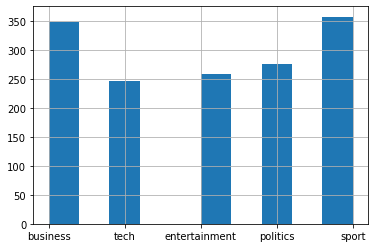

In [122]:
df_train['category'].hist()

<AxesSubplot:>

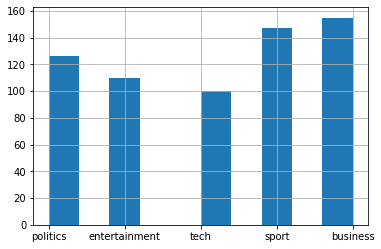

In [123]:
df_test['category'].hist()

# TF VECTORIZER MODEL

In [466]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [483]:
train = pd.read_csv('BBC_train.csv')
test = pd.read_csv('BBC_test.csv')

In [485]:
train_X = train['text_clean']   
train_y = train['label']   
test_X = test['text_clean']
test_y = test['label']

In [482]:
#train.to_csv('BBC_train.csv', index=False)
#test.to_csv('BBC_test.csv', index=False)

## Applying tf vectorizer (count vectorizer)

- to extract features from training data

In [487]:
tf_vectorizer = CountVectorizer() # term frequency

X_train_tf = tf_vectorizer.fit_transform(train_X)

print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 1489, n_features: 23439


##  Transforming test data into tf-vectorized matrix

- to extract features from test data

In [488]:
X_test_tf = tf_vectorizer.transform(test_X)

print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 638, n_features: 23439


# Naive Bayes

In [489]:
t = time()

Naive_Bayes = MultinomialNB()
Naive_Bayes.fit(X_train_tf, train_y)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.004s


### Calculating accuracy and generating classification report from test data

In [490]:
# predict the new document from the testing dataset
t = time()
y_pred = Naive_Bayes.predict(X_test_tf)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(test_y, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_y, y_pred, target_names=['0','1', '2', '3', '4']))

print("confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred))

print('------------------------------')

test time:  0.001s
accuracy:   0.978
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       155
           1       1.00      0.96      0.98       110
           2       0.97      0.98      0.98       126
           3       1.00      1.00      1.00       147
           4       0.93      0.98      0.96       100

    accuracy                           0.98       638
   macro avg       0.98      0.98      0.98       638
weighted avg       0.98      0.98      0.98       638

confusion matrix:
[[149   0   3   0   3]
 [  0 106   1   0   3]
 [  1   0 124   0   1]
 [  0   0   0 147   0]
 [  2   0   0   0  98]]
------------------------------


In [492]:
len(y_pred)

638

# TF / Naive-Bayes function to predict

In [531]:
def TF_Naive_Bayes(data):
    train = pd.read_csv('BBC_train.csv')
    test = pd.read_csv('BBC_test.csv')
    
    train_X = train['text_clean']   
    train_y = train['label']   
    data = data['text_clean']
    #test_X = test['text_clean']
    #test_y = test['label']
    
    tf_vectorizer = CountVectorizer() # term frequency
    X_train_tf = tf_vectorizer.fit_transform(train_X)
    #debería meter aquí mi nuevo dataset
    #X_test_tf = tf_vectorizer.transform(test_X)
    X_data_tf = tf_vectorizer.transform(data)
    
    
    Naive_Bayes = MultinomialNB()
    Naive_Bayes.fit(X_train_tf, train_y)
    
    y_pred = Naive_Bayes.predict(X_data_tf)
    
    return y_pred
    

## APPLYING NAIVE BAYES TO API DATA

In [532]:
data = pd.read_csv('API_data_cleaned.csv')

In [533]:
data.head()

,text_clean
0,"['call', 'online', 'abusers', 'reported', 'gro..."
1,"['tokyo', 'olympics', 'india', 'top', 'medal',..."
2,"['benin', 'bronzes', 'nigeria', 'dispute', 'je..."
3,"['soldier', 'statue', 'reignites', 'spanish', ..."
4,"['covid', 'us', 'vaccine', 'rollout', 'slowing..."


In [541]:
category = TF_Naive_Bayes(data)

In [543]:
len(category)

800

In [544]:
category_df=pd.DataFrame(category)

In [539]:
All = pd.read_csv('BBC_df_8days_API_28_07_2021.csv')

In [540]:
All

,title,description,url
0,Call for online abusers to be reported to empl...,A group is calling for companies to set up way...,https://www.bbc.co.uk/news/technology-57907852
1,Tokyo 2020 Olympics: India's top medal contenders,India sends its largest ever contingent to the...,https://www.bbc.co.uk/news/world-asia-india-57...
2,Benin Bronzes: Nigeria dispute jeopardises ret...,Several museums in Europe have talked of retur...,https://www.bbc.co.uk/news/world-africa-57914111
3,Soldier statue reignites Spanish row over fascism,"Spain's legionnaires symbolised fascism, but M...",https://www.bbc.co.uk/news/world-europe-57902023
4,Covid: Where and why is the US vaccine rollout...,Vaccinations in the US are slowing as infectio...,https://www.bbc.co.uk/news/57889961
...,...,...,...
795,Tokyo Olympics: Daniil Medvedev & Paula Badosa...,Daniil Medvedev struggles to breathe in the To...,https://www.bbc.co.uk/sport/olympics/57995342
796,Oculus recalls Quest 2 headset pads after skin...,Quest 2 headset owners are urged to claim a fr...,https://www.bbc.co.uk/news/technology-57997112
797,'Superhuman Biles is brave & strong - and her ...,Athletes discuss Simone Biles' decision to pri...,https://www.bbc.co.uk/sport/olympics/57996321
798,Tokyo Olympics: Argentina beat Great Britain 1...,Team GB miss out on a medal after a 17-12 defe...,https://www.bbc.co.uk/sport/av/olympics/57998199


In [546]:
All['category'] = category_df

- business: 0
- entertainment: 1
- politics: 2
- sport: 3
- tech: 4

In [549]:
All['description'][3]

"Spain's legionnaires symbolised fascism, but Madrid may soon have a statue honouring them."

In [547]:
All

,title,description,url,category
0,Call for online abusers to be reported to empl...,A group is calling for companies to set up way...,https://www.bbc.co.uk/news/technology-57907852,4
1,Tokyo 2020 Olympics: India's top medal contenders,India sends its largest ever contingent to the...,https://www.bbc.co.uk/news/world-asia-india-57...,3
2,Benin Bronzes: Nigeria dispute jeopardises ret...,Several museums in Europe have talked of retur...,https://www.bbc.co.uk/news/world-africa-57914111,0
3,Soldier statue reignites Spanish row over fascism,"Spain's legionnaires symbolised fascism, but M...",https://www.bbc.co.uk/news/world-europe-57902023,3
4,Covid: Where and why is the US vaccine rollout...,Vaccinations in the US are slowing as infectio...,https://www.bbc.co.uk/news/57889961,0
...,...,...,...,...
795,Tokyo Olympics: Daniil Medvedev & Paula Badosa...,Daniil Medvedev struggles to breathe in the To...,https://www.bbc.co.uk/sport/olympics/57995342,3
796,Oculus recalls Quest 2 headset pads after skin...,Quest 2 headset owners are urged to claim a fr...,https://www.bbc.co.uk/news/technology-57997112,4
797,'Superhuman Biles is brave & strong - and her ...,Athletes discuss Simone Biles' decision to pri...,https://www.bbc.co.uk/sport/olympics/57996321,2
798,Tokyo Olympics: Argentina beat Great Britain 1...,Team GB miss out on a medal after a 17-12 defe...,https://www.bbc.co.uk/sport/av/olympics/57998199,3


<AxesSubplot:>

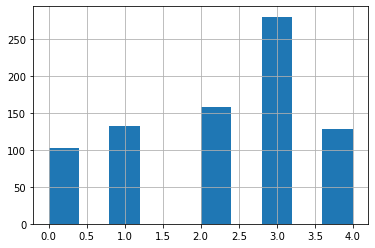

In [550]:
All['category'].hist()

### get df from API CNN news